Regressão Linear Múltipla

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Dados de entrada
horas_estudo = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
exercicios = [3, 4, 5, 6, 7, 4, 3, 5, 6, 7, 8, 4, 3, 5, 6]
notas = [65, 78, 89, 92, 98, 75, 69, 80, 88, 94, 100, 72, 68, 82, 90]

In [3]:
# Criar matriz X com colunas de Horas de Estudo e Exercícios
X = np.array([horas_estudo, exercicios]).T

# Adicionar coluna de 1s para o termo linear
X = np.column_stack((np.ones(len(X)), X))

# Criar vetor Y de Notas
Y = np.array(notas).reshape(-1, 1)

# Calcular os coeficientes usando a fórmula dos mínimos quadrados (X'X)^{-1}X'y
coeficientes = np.linalg.inv(X.T @ X) @ X.T @ Y

In [4]:
coeficientes

array([[49.04846365],
       [-0.25685736],
       [ 7.09143143]])

In [5]:
# Estimativa de notas usando horas de estudos + exercicios
notas_estimadas = X @ coeficientes

In [6]:
np.array(notas) - np.array(notas_estimadas).T[0]

array([-4.80904322,  1.35638271,  5.52180864,  1.68723457,  0.8526605 ,
       -0.61618786,  0.73210092, -2.19390457, -1.02847864, -1.86305271,
       -2.69762678, -2.07504372,  1.27324507,  1.34723957,  2.5126655 ])

In [7]:
# componente de horas de estudos na variancia de notas
var_horas_estudo = (coeficientes[1] ** 2) * (np.var(horas_estudo))
var_horas_estudo

# componente de exercicios na variancia de notas
var_exercicios = (coeficientes[2] ** 2) * (np.var(exercicios))
var_exercicios

# componente de residuos na variancia de notas
residuo = np.array(notas) - np.array(notas_estimadas).T[0]
var_residuos = np.var(residuo)

print(
    "E_var_notas: ",
    var_horas_estudo + var_exercicios + var_residuos,
    ", var_notas: ",
    np.var(notas),
)

E_var_notas:  [124.38905062] , var_notas:  119.28888888888888


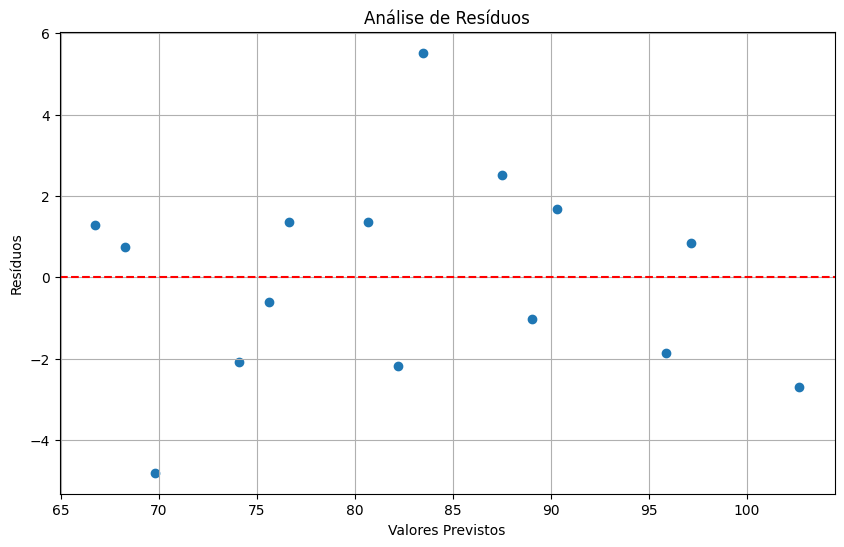

In [8]:
# Calcular os resíduos
residuos = Y - notas_estimadas

# Plotar gráfico de resíduos versus valores previstos
plt.figure(figsize=(10, 6))
plt.scatter(notas_estimadas, residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Análise de Resíduos")
plt.grid()
plt.show()

In [9]:
# Criando um DataFrame com as variáveis exógenas (horas_estudo, exercicios) e a variável endógena (notas)
aluno = pd.DataFrame(
    {"horas_estudo": horas_estudo, "exercicios": exercicios, "notas": notas}
)

# Adicionando uma coluna de 1s (termo linear) ao DataFrame
aluno = sm.add_constant(aluno)

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = aluno.drop(
    "notas", axis=1
)  # Excluindo a coluna "notas" para obter as variáveis independentes (features)
y = aluno.notas  # Definindo a variável dependente (target ou alvo)

# Criando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo um resumo da análise de regressão
print(model.summary())

# Fazendo uma previsão com o modelo usando os dados da primeira linha
previsao_primeira_linha = model.predict(X.head(1))
print("y estimado para 1a linha:", previsao_primeira_linha)

                            OLS Regression Results                            
Dep. Variable:                  notas   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.69e-08
Time:                        10:49:38   Log-Likelihood:                -34.774
No. Observations:                  15   AIC:                             75.55
Df Residuals:                      12   BIC:                             77.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           49.0485      2.656     18.467   

c:\GitHub\CEDS-805\venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Coeficiente de Determinação (R2)

In [10]:
SQE = sum((notas_estimadas - np.mean(notas_estimadas)) ** 2)
SQT = sum((notas - np.mean(notas)) ** 2)

R2 = SQE / SQT

print(R2)

[0.94935481]


Variância dos coeficientes estimados

In [11]:
var_resid = model.resid.var()
dp_coeficientes = np.diag(var_resid * np.linalg.inv(X.T @ X)) ** 0.5

print(dp_coeficientes)

[2.4589645  0.15559282 0.44050268]


Limites inferior e superior do intervalo de confiança dos coeficientes

In [12]:
IC_inferior = coeficientes[0] - 1.96 * dp_coeficientes[0]
IC_superior = coeficientes[0] + 1.96 * dp_coeficientes[0]
print("IC_inferior_alfa:", IC_inferior, ", IC_superior_alfa:", IC_superior)

IC_inferior = coeficientes[1] - 1.96 * dp_coeficientes[1]
IC_superior = coeficientes[1] + 1.96 * dp_coeficientes[1]
print(
    "IC_inferior_horas_estudo:", IC_inferior, ", IC_superior_horas_estudo:", IC_superior
)

IC_inferior = coeficientes[2] - 1.96 * dp_coeficientes[2]
IC_superior = coeficientes[2] + 1.96 * dp_coeficientes[2]
print("IC_inferior_exercicios:", IC_inferior, ", IC_superior_exercicios:", IC_superior)

IC_inferior_alfa: [44.22889323] , IC_superior_alfa: [53.86803407]
IC_inferior_horas_estudo: [-0.56181929] , IC_superior_horas_estudo: [0.04810457]
IC_inferior_exercicios: [6.22804617] , IC_superior_exercicios: [7.95481668]
